In [127]:
import matplotlib.pyplot as plt
import geopy.distance
import networkx as nx
import pandas as pd
import numpy as np
import regex as re
import requests
import os

# defaults
adjacency_path = os.path.join("test_adjacency.csv")
global counties
global neighbors

# classes
class Path:
    def __init__(self):
        self.path = []
        self.total_cost = 0
    
class County:
    def __init__(self, txt:str):
        self.name = txt.split(",")[0]
        self.state = txt.split(",")[1]
        self.neighbors = []
        # coordinates
        self.lat = 0.0
        self.long = 0.0

        self.visited = False
        self.goal = False
        self.color = ""

        self.g = np.inf # distance from start
        self.h = np.inf # heuristic distance from the goal
        self.f = self.g + self.h
    
    def add_neighbor(self, neighbor):
        if f"{self.name}, {self.state}" != f"{neighbor.name}, {neighbor.state}":
            self.neighbors.append(neighbor)

# reads the csv file and converts it into a dataframe
def read_neighborgs(file_name: os) -> pd.DataFrame:
    return pd.read_csv(file_name)

# returns the unique values in a df[col_name]
def get_unique_list(df: pd.DataFrame, col_name: str) -> list:
    return list(set(df[col_name]))

# gets a list of text and returns a list of County objects
def make_object_list(lst: list) -> list:
    return [County(c) for c in lst]

# making the dataframe into objects and adding their neighbors
def preparing_objects(raw_df: pd.DataFrame) -> dict:
    (unique_counties, unique_neighbors) = (get_unique_list(raw_df, 'countyname'), get_unique_list(raw_df, 'neighborname')) # to hold the unique text values of counties and neighbors
    (county_objects, neighbor_objects) = (make_object_list(unique_counties), make_object_list(unique_neighbors)) # transforming the text lists into a County objects list

    # having a dict that represents the unique counties.
    # key == (county.name, county.state) / (neighbor.name, neighbor.state)
    # value = county object / neighbor object
    counties_dict = {county.name + "," + county.state: county for county in county_objects} 
    neighbors_dict = {neighbor.name + "," + neighbor.state: neighbor for neighbor in neighbor_objects}

    for _, record in raw_df.iterrows():
        county = record['countyname']
        neighbor = record['neighborname']
        cnty_object = counties_dict[county]
        neighbor_object = neighbors_dict[neighbor]
        # adding the county object it's neighbors
        cnty_object.add_neighbor(neighbor_object)

    return (counties_dict, neighbors_dict)

# gets the county coordiהם לnates using it's name and state - using the attached url
def get_county_coordinates(county_name: str) -> tuple:
    """
    to measure distance: geopy.distance.geodesic(coord1, coord2).km
    Get the latitude and longitude coordinates of a state using its name.
    """
    url = f"https://nominatim.openstreetmap.org/search?q={state_name}&format=json"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data:
            return float(data[0]['lat']), float(data[0]['lon'])
    return None

if __name__ == "__main__":
    # initiallizing
    raw_df = read_neighborgs(adjacency_path)
    counties, neighbors = preparing_objects(raw_df) # dict: {county.name, county.state: county object} and same for neighbors

    


In [128]:
# finds the shortest path from the starting locations to the goal location
# using a search method - an integer
# details_output = {F: showing only the paths, T: prints the first iteration and the heuristic value of the first steps -> <value, value, value, ...>}
def find_path(starting_locations ,goal_locations ,search_method, detail_output):
    if (search_method == 1):
        path = a_star(starting_locations, goal_locations,detail_output, False)
    else:
        pass

# preform a* search from a starting location to one of the ending locations in the goal list - all in the same color party
# i assume that len(starting_locations) == len(goal_locations)
def a_star(starting_locations: list, goal_locations: list,search_method: int, detail_output: bool):
    pass

# input
start_locations = ['Blue, Washington County, UT', 'Blue, Chicot County, AR', 'Red, Fairfield County, CT']
goal_locations = ['Blue, San Diego, CA', 'Blue, Bienville Parish, LA', 'Red, Rensselaer County, NY']

# returns a list for the same color
def get_list_per_color(lst: list, pattern: re.Pattern) -> list:
    return [loc.replace('Red, ','').replace('Blue, ', '') for loc in lst if re.search(pattern, loc)]

# dividing the starting locations and goal locations into different lists according to their colors.
red_starts = get_list_per_color(start_locations, r'Red, \w*')
red_goals = get_list_per_color(goal_locations, r'Red, \w*')
blue_starts = get_list_per_color(start_locations, r'Blue, \w*')
blue_goals = get_list_per_color(goal_locations, r'Blue, \w*')



# Vizualisation


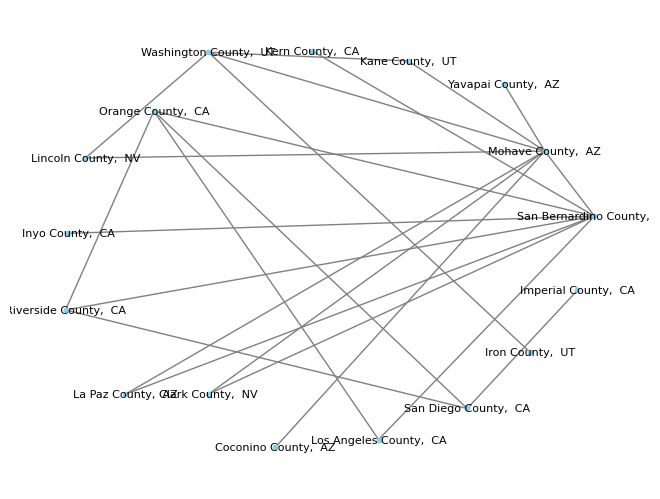

In [133]:

# Create an empty graph
g = nx.Graph()

for county in counties.values():
    county_id = county.name + ', ' + county.state
    # adds the county node if it doesn't already exist
    if county_id not in g.nodes:
        g.add_node(county_id, header=county_id)
    
    # connects the county node to its neighboring county nodes
    for neighbor in county.neighbors:
        neighbor_id = neighbor.name + ', ' + neighbor.state
        # if the neighbor is already in the graph, connect them
        if neighbor_id in g.nodes:
            g.add_edge(county_id, neighbor_id)
        # if the neighbor is not in the graph, create it and then connect them
        else:
            g.add_node(neighbor_id, header=neighbor_id)
            g.add_edge(county_id, neighbor_id)

# Compute the layout for the graph
pos = nx.spring_layout(g, k=5) # , iterations=100

# Draw the graph
nx.draw(g, pos, labels=nx.get_node_attributes(g, 'header'), with_labels=True, node_color='skyblue', node_size=10, font_size=8, edge_color='gray')

# Display the plot
plt.show()
